In [1]:
from similarIV import processing_data,instant_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use Olypic data set as example

## Using only ID, Sex, Age, Height, Weight, Sport, Medal as interested columns

In [2]:
### Use olympic data set as example
df = pd.read_csv('data/120-years-of-olympic-history-athletes-and-results/athlete_events.csv', encoding='utf8')

In [4]:
df['Medal'] = df['Medal'].fillna('na')

In [5]:
df['Medal'] = df['Medal'].apply(lambda x: 1 if x!='na' else 0)

In [6]:
df = df[['ID','Sex','Age','Height','Weight','Sport','Medal']]

In [7]:
train = df.sample(int(df.shape[0]*0.8))

In [8]:
test = df.drop(train.index, errors="ignore")

In [9]:
test = test.drop(['Medal'],axis=1)

In [10]:
train.head()

ID Sex   Age  Height  Weight             Sport  Medal
101356   51257   M  26.0   171.0    69.0          Canoeing      0
192356   96589   M  28.0   184.0    68.0            Rowing      0
243395  121894   M  17.0   181.0    74.0  Freestyle Skiing      0
18240     9676   M  24.0     NaN     NaN         Bobsleigh      0
119281   60385   F  23.0   156.0    51.0      Table Tennis      0

# Starting to calculate IVs

In [11]:
# Told library which columns is categorical, numerical, or target
category_columns = ['Sex','Sport']
continuos_columns = ['Age','Height','Weight']
target_columns = 'Medal'

### Use "processing_data.combine_continus_norm_and_categorical_onehot_and_sep_target" to pre-process data

In [12]:
feature_df, target_df, mean_dict, std_dict, feature_df_columns = processing_data.combine_continus_norm_and_categorical_onehot_and_sep_target(train, continuos_columns, category_columns, target_columns)

In [13]:
feature_df

Age    Height    Weight  col_Sex_F  col_Sex_M  \
101356  0.170193  0.470331  0.452510          0          1   
192356  0.425259  0.647343  0.421650          0          1   
243395 -0.977605  0.606494  0.606808          0          1   
18240  -0.084873 -1.858065 -1.676799          0          1   
119281 -0.212407  0.266086 -0.102962          1          0   
...          ...       ...       ...        ...        ...   
108836 -0.467473 -1.858065 -1.676799          0          1   
59698   0.170193  0.388633  0.298212          1          0   
27488  -0.084873  0.456714  0.329072          0          1   
78087  -0.595006  0.565645  0.421650          1          0   
196810 -0.084873  0.565645  0.977122          1          0   

        col_Sport_Aeronautics  col_Sport_Alpine Skiing  col_Sport_Alpinism  \
101356                      0                        0                   0   
192356                      0                        0                   0   
243395                      0                        0                   0   
18240                       0                        0                   0   
119281                      0                        0                   0   
...                       ...                      ...                 ...   
108836                      0                        0                   0   
59698                       0                        0                   0   
27488                       0                        0                   0   
78087                       0                        0                   0   
196810                      0                        0                   0   

        col_Sport_Archery  col_Sport_Art Competitions  ...  \
101356                  0                           0  ...   
192356                  0                           0  ...   
243395                  0                           0  ...   
18240                   0                           0  ...   
119281                  0                           0  ...   
...                   ...                         ...  ...   
108836                  0                           0  ...   
59698                   0                           0  ...   
27488                   0                           0  ...   
78087                   0                           0  ...   
196810                  0                           0  ...   

        col_Sport_Table Tennis  col_Sport_Taekwondo  col_Sport_Tennis  \
101356                       0                    0                 0   
192356                       0                    0                 0   
243395                       0                    0                 0   
18240                        0                    0                 0   
119281                       1                    0                 0   
...                        ...                  ...               ...   
108836                       0                    0                 0   
59698                        0                    0                 0   
27488                        0                    0                 0   
78087                        0                    0                 0   
196810                       0                    0                 0   

        col_Sport_Trampolining  col_Sport_Triathlon  col_Sport_Tug-Of-War  \
101356                       0                    0                     0   
192356                       0                    0                     0   
243395                       0                    0                     0   
18240                        0                    0                     0   
119281                       0                    0                     0   
...                        ...                  ...                   ...   
108836                       0                    0                     0   
59698                        0                    0                     0   
27488           

In [14]:
#mean_dict

In [15]:
#std_dict

In [16]:
feature_df_columns

Index(['Age', 'Height', 'Weight', 'col_Sex_F', 'col_Sex_M',
       'col_Sport_Aeronautics', 'col_Sport_Alpine Skiing',
       'col_Sport_Alpinism', 'col_Sport_Archery', 'col_Sport_Art Competitions',
       'col_Sport_Athletics', 'col_Sport_Badminton', 'col_Sport_Baseball',
       'col_Sport_Basketball', 'col_Sport_Basque Pelota',
       'col_Sport_Beach Volleyball', 'col_Sport_Biathlon',
       'col_Sport_Bobsleigh', 'col_Sport_Boxing', 'col_Sport_Canoeing',
       'col_Sport_Cricket', 'col_Sport_Croquet',
       'col_Sport_Cross Country Skiing', 'col_Sport_Curling',
       'col_Sport_Cycling', 'col_Sport_Diving', 'col_Sport_Equestrianism',
       'col_Sport_Fencing', 'col_Sport_Figure Skating', 'col_Sport_Football',
       'col_Sport_Freestyle Skiing', 'col_Sport_Golf', 'col_Sport_Gymnastics',
       'col_Sport_Handball', 'col_Sport_Hockey', 'col_Sport_Ice Hockey',
       'col_Sport_Jeu De Paume', 'col_Sport_Judo', 'col_Sport_Lacrosse',
       'col_Sport_Luge', 'col_Sport_Military Ski

In [17]:
target_df

101356    0
192356    0
243395    0
18240     0
119281    0
         ..
108836    0
59698     1
27488     0
78087     0
196810    0
Name: Medal, Length: 216892, dtype: int64

In [18]:
IVs_df, ivs_vector = processing_data.get_IV(feature_df, target_df)

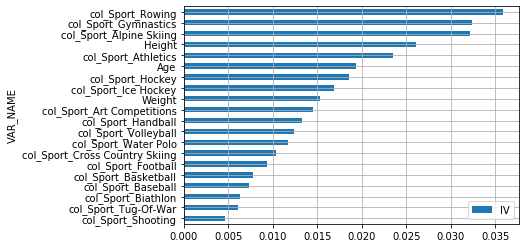

In [19]:
IVs_df.sort_values('IV', ascending=False).head(20).set_index('VAR_NAME').sort_values('IV').plot(kind='barh', grid=True)

In [20]:
ivs_vector

array([1.93223326e-02, 2.60399339e-02, 1.52826776e-02, 4.34948885e-04,
       4.34948885e-04, 9.89211533e-10, 3.21771802e-02, 4.78936568e-07,
       2.69558470e-06, 1.44716567e-02, 2.35582318e-02, 4.18922598e-04,
       7.28318927e-03, 7.79802220e-03, 9.89211533e-10, 3.93494081e-05,
       6.27938122e-03, 1.66827795e-04, 7.64375334e-05, 2.46448696e-03,
       3.95802890e-07, 2.77380390e-04, 1.03272130e-02, 2.39889090e-03,
       2.62463611e-03, 2.50638628e-05, 1.28633317e-05, 9.08890567e-04,
       1.69984551e-04, 9.40390255e-03, 3.57620678e-04, 9.25939478e-05,
       3.23927559e-02, 1.33390728e-02, 1.85998628e-02, 1.68841808e-02,
       7.38672813e-06, 8.80292329e-06, 2.57496444e-06, 2.30431080e-04,
       4.58937962e-04, 5.99089836e-04, 1.10305865e-04, 4.28111168e-04,
       3.75641595e-03, 2.82307774e-04, 5.65569227e-04, 9.89211533e-10,
       3.58194025e-02, 1.64946944e-05, 6.83100618e-04, 2.06012970e-03,
       4.69057866e-03, 6.05275845e-04, 3.27608518e-05, 2.71999787e-03,
      

### Use "process_test_data" to pre-process test data, using same mean/std to standardize

In [22]:
feature_test = processing_data.process_test_data(test, continuos_columns, category_columns, mean_dict, std_dict, feature_df_columns)

In [23]:
feature_test

Age    Height    Weight  col_Sex_F  col_Sex_M  \
10      0.850876  1.201382  0.296481          0          1   
14      1.163528  1.201382  0.296481          0          1   
25      1.163528  0.726465  0.088085          0          1   
30     -0.556054  0.631481  0.400678          0          1   
32      0.694551 -1.553139 -1.058089          1          0   
...          ...       ...       ...        ...        ...   
271089  1.319853  1.581317  1.685783          0          1   
271095 -0.087077  0.631481  0.574341          0          1   
271099  1.632505 -0.413337 -0.537101          1          0   
271101 -0.243403 -0.223370 -0.189775          0          1   
271105 -0.399729 -0.698288  0.365946          0          1   

        col_Sport_Aeronautics  col_Sport_Alpine Skiing  col_Sport_Alpinism  \
10                          0                        0                   0   
14                          0                        0                   0   
25                          0                        0                   0   
30                          0                        0                   0   
32                          0                        0                   0   
...                       ...                      ...                 ...   
271089                      0                        0                   0   
271095                      0                        0                   0   
271099                      0                        0                   0   
271101                      0                        0                   0   
271105                      0                        0                   0   

        col_Sport_Archery  col_Sport_Art Competitions  ...  \
10                      0                           0  ...   
14                      0                           0  ...   
25                      0                           0  ...   
30                      0                           0  ...   
32                      0                           0  ...   
...                   ...                         ...  ...   
271089                  0                           0  ...   
271095                  0                           0  ...   
271099                  0                           0  ...   
271101                  0                           0  ...   
271105                  0                           0  ...   

        col_Sport_Table Tennis  col_Sport_Taekwondo  col_Sport_Tennis  \
10                           0                    0                 0   
14                           0                    0                 0   
25                           0                    0                 0   
30                           0                    0                 0   
32                           0                    0                 0   
...                        ...                  ...               ...   
271089                       0                    0                 0   
271095                       0                    0                 0   
271099                       0                    0                 0   
271101                       0                    0                 0   
271105                       0                    0                 0   

        col_Sport_Trampolining  col_Sport_Triathlon  col_Sport_Tug-Of-War  \
10                           0                    0                     0   
14                           0                    0                     0   
25                           0                    0                     0   
30                           0                    0                     0   
32                           0                    0                     0   
...                        ...                  ...                   ...   
271089                       0                    0                     0   
271095                       0                    0                     0   
271099          

In [26]:
#list(feature_test.columns)

In [27]:
#list(feature_df_columns)

In [28]:
## drop some test columns that not exist in train column
non_in_test_columns = list(set(list(feature_df_columns)) - set(list(feature_test.columns)))

In [30]:
## Final test data with weighting 
feature_test[feature_df_columns]

Age    Height    Weight  col_Sex_F  col_Sex_M  \
10      0.850876  1.201382  0.296481          0          1   
14      1.163528  1.201382  0.296481          0          1   
25      1.163528  0.726465  0.088085          0          1   
30     -0.556054  0.631481  0.400678          0          1   
32      0.694551 -1.553139 -1.058089          1          0   
...          ...       ...       ...        ...        ...   
271089  1.319853  1.581317  1.685783          0          1   
271095 -0.087077  0.631481  0.574341          0          1   
271099  1.632505 -0.413337 -0.537101          1          0   
271101 -0.243403 -0.223370 -0.189775          0          1   
271105 -0.399729 -0.698288  0.365946          0          1   

        col_Sport_Aeronautics  col_Sport_Alpine Skiing  col_Sport_Alpinism  \
10                          0                        0                   0   
14                          0                        0                   0   
25                          0                        0                   0   
30                          0                        0                   0   
32                          0                        0                   0   
...                       ...                      ...                 ...   
271089                      0                        0                   0   
271095                      0                        0                   0   
271099                      0                        0                   0   
271101                      0                        0                   0   
271105                      0                        0                   0   

        col_Sport_Archery  col_Sport_Art Competitions  ...  \
10                      0                           0  ...   
14                      0                           0  ...   
25                      0                           0  ...   
30                      0                           0  ...   
32                      0                           0  ...   
...                   ...                         ...  ...   
271089                  0                           0  ...   
271095                  0                           0  ...   
271099                  0                           0  ...   
271101                  0                           0  ...   
271105                  0                           0  ...   

        col_Sport_Table Tennis  col_Sport_Taekwondo  col_Sport_Tennis  \
10                           0                    0                 0   
14                           0                    0                 0   
25                           0                    0                 0   
30                           0                    0                 0   
32                           0                    0                 0   
...                        ...                  ...               ...   
271089                       0                    0                 0   
271095                       0                    0                 0   
271099                       0                    0                 0   
271101                       0                    0                 0   
271105                       0                    0                 0   

        col_Sport_Trampolining  col_Sport_Triathlon  col_Sport_Tug-Of-War  \
10                           0                    0                     0   
14                           0                    0                     0   
25                           0                    0                     0   
30                           0                    0                     0   
32                           0                    0                     0   
...                        ...                  ...                   ...   
271089                       0                    0                     0   
271095                       0                    0                     0   
271099          

#### After done calculate Information Values (IV) and multiple it back to dataset, can use simple cosine similarity to find similarity